In [131]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import uniform
# import random as rand
# from scipy.stats import norm

In [132]:
def plot(X):
    plt.figure(figsize = (4,3))
    plt.hist(X, bins = 15, alpha = 0.5, label = "Stabe distribution")
    plt.legend()
    plt.show()

# $\alpha$-stable distribution

In [133]:
def stable(alpha, beta, gamma, delta, n):
    Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
    W = np.random.exponential(1, n)
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
    if alpha != 1:
        Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
        X = gamma * Z + delta
    else:
        Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
        X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
    return X

# $\alpha$-stable vector

In [134]:
def stable_vector(Zs, gammas, ss, d, alpha):
    Xs = []
    n = len(gammas)
    for i in range(d):
        X = []
        if alpha == 1:
            for j in range(n):
                X.append(gammas[j] * (Zs[j] + 2/np.pi * np.log(gammas[j])) * ss[j][i])
            Xs.append(sum(X))
        else:
            for j in range(n):
                X.append(np.power(gammas[j], 1/alpha) * Zs[j] * ss[j][i])
            Xs.append(sum(X))
    return Xs

## Codifference

In [135]:
def codif(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    cf_xy = np.mean(np.exp(1j * (X - Y)))
    cf_x = np.mean(np.exp(1j * X ))
    cf_y = np.mean(np.exp(1j * (-Y)))
    tau = np.log(np.real(cf_xy)) - np.log(np.real(cf_x)) - np.log(np.real(cf_y))
    return tau

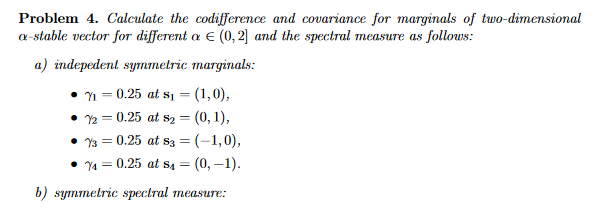

In [136]:
n = 10000
beta = 1
gamma = 1
delta = 0
d = 2
alpha = [0.2, 0.5, 0.7, 1, 1.2, 1.5, 1.7, 2]

In [137]:
gammas = [0.25, 0.25, 0.25, 0.25]
ss = [[1, 0], 
      [0, 1], 
      [-1, 0],
      [0, -1]]

In [138]:
Zs = []
for al in alpha:
    Zs.append([stable(al, beta, gamma, delta, n) for _ in gammas])
Xs = [stable_vector(Zs[i], gammas, ss, d, alpha[i]) for i in range(len(Zs))]

In [139]:
print(codif(Xs[0], Xs[1]), codif(Xs[1], Xs[0]))

0.005090693476117347 0.005090693476117347


In [140]:
for i in range(len(Xs)):
    print(f"alpha = {alpha[i]}, \tTau = {codif(Xs[i][0], Xs[i][1])}, \tCov = {np.cov(Xs[i][0], Xs[i][1])[0][1]}")

alpha = 0.2, 	Tau = 0.011601236490193678, 	Cov = 2.1279177309444493e+30
alpha = 0.5, 	Tau = -0.011004590603934827, 	Cov = 2095981.9367531878
alpha = 0.7, 	Tau = 0.0086157685843532, 	Cov = 3770.281743096354
alpha = 1, 	Tau = -0.007574375386808052, 	Cov = 0.5747952391679684
alpha = 1.2, 	Tau = 0.00013686936682200113, 	Cov = -0.056207733441321975
alpha = 1.5, 	Tau = -0.02226974471185278, 	Cov = 0.01180185820683462
alpha = 1.7, 	Tau = -0.007514173398357138, 	Cov = -0.0033475476475921867
alpha = 2, 	Tau = -0.011050738233418789, 	Cov = 0.0027762554561799146


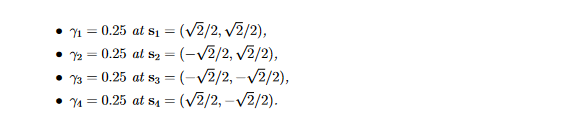

In [141]:
gammas = [0.25, 0.25, 0.25, 0.25]
ss = [[np.sqrt(2)/2, np.sqrt(2)/2], 
      [-np.sqrt(2)/2, np.sqrt(2)/2], 
      [-np.sqrt(2)/2, -np.sqrt(2)/2],
      [np.sqrt(2)/2, -np.sqrt(2)/2]]

In [142]:
# Zs = []
# for al in alpha:
#     Zs.append([stable(al, beta, gamma, delta, n) for _ in gammas])
Xs = [stable_vector(Zs[i], gammas, ss, d, alpha[i]) for i in range(len(Zs))]

In [143]:
print(codif(Xs[0], Xs[1]), codif(Xs[1], Xs[0]))

-0.005532942395810481 -0.005532942395810481


In [144]:
for i in range(len(Xs)):
    print(f"alpha = {alpha[i]}, \tTau = {codif(Xs[i][0], Xs[i][1])}, \tCov = {np.cov(Xs[i][0], Xs[i][1])[0][1]}")

alpha = 0.2, 	Tau = 1.3497315934730039, 	Cov = 2.9602758791061667e+35
alpha = 0.5, 	Tau = 1.0822032630372116, 	Cov = 65676990726.48848
alpha = 0.7, 	Tau = 0.9268333722960904, 	Cov = 529333961.8562667
alpha = 1, 	Tau = 0.6787392574329902, 	Cov = 1148.6012113106729
alpha = 1.2, 	Tau = 0.5730694662502944, 	Cov = 158.4116965805871
alpha = 1.5, 	Tau = 0.35340451525219885, 	Cov = -8.57307677199434
alpha = 1.7, 	Tau = 0.1886173346135115, 	Cov = -2.556343968770931
alpha = 2, 	Tau = 0.0010081875433302079, 	Cov = 0.0007389988539354265


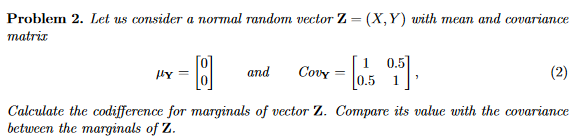

In [145]:
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
Z = np.random.multivariate_normal(mean, cov, size = n)
Z = np.transpose(Z)

In [146]:
print(codif(Z[0], Z[1]))

0.5147177905223512


In [147]:
Zs = np.random.normal(loc = 0.0, scale = 1.0, size = (2, n))

In [148]:
Zs

array([[-0.8419899 , -2.08332582,  0.37303794, ..., -0.18749072,
        -0.39860088, -0.50315348],
       [ 0.34545843,  0.8691202 , -0.75835158, ...,  0.53700251,
         0.64921506, -1.71656844]])

In [149]:
codif(Zs[0], Zs[1])

-0.006939297892788909